In [1]:
from gos import World, Neighborhood
from gos import visualization 
import matplotlib
import pandas as pd

In [2]:
def file_path(name):
    """
    Shortcut function to get the relative path to the directory
    which contains the data.
    """
    return "./examples/multiscale-migration/data/%s" % name

In [3]:
column_names = ["Name", "Code"]

def country_codes():
    """
    Build country rows from their names, ISO codes, and Numeric
    Country Codes.
    """
    cc = (
        pd.read_csv(
            file_path(
                "Country_List_ISO_3166_Codes_Latitude_Longitude.csv"),
            usecols=[0, 2, 3],
            index_col=1,
            keep_default_na=False))
    cc.columns = column_names
    return cc

def other_codes():
    other_codes = pd.read_csv(file_path("other.csv"), index_col=1)
    other_codes.columns = column_names[0:1]
    return other_codes

world = World(index=set(country_codes().index) | set(other_codes().index))
Neighborhood.update(country_codes().groupby("Alpha-3 code")["Name"].apply(list).to_dict())
Neighborhood.update(other_codes().groupby('ISO')["Name"].apply(list).to_dict())
Neighborhood.update(country_codes().groupby("Alpha-3 code")["Code"].apply(list).to_dict())

In [4]:
population = pd.read_csv(file_path("newPOP.csv"))
population = population.set_index("Country")

world.update_neighborhoods(population)

Could not find:  ['Faroe Isladns', 'Federated States of microstesa', 'Isle of man', 'Saint Martin', 'Northern Mariana', 'Saint Maarten']
Dropped:  [None, None, None, None, None, None]
Not found in other sets:  ['SGS', 'ESH', 'SXM', 'IMN', 'CCK', 'NFK', 'COK', 'BVT', 'SJM', 'GGY', 'UMI', 'MTQ', 'GUF', 'MNP', 'BES', 'FLK', 'HMD', 'FSM', 'MSR', 'WLF', 'JEY', 'AIA', 'ATA', 'IOT', 'TWN', 'PCN', 'GLP', 'VAT', 'FRO', 'SHN', 'CXR', 'SPM', 'TKL', 'MYT', 'REU', 'PSE', 'NIU', 'ANT', 'ATF']


,Population
ABW,1.016690e+05
AFG,2.880317e+07
AGO,2.336913e+07
ALB,2.913021e+06
AND,8.444900e+04
ARE,8.270684e+06
ARG,4.122389e+07
ARM,2.877311e+06
ASM,5.563700e+04
ATG,9.466100e+04


In [5]:
un_pd = pd.read_excel(
        file_path(
            "UN_MigrantStockByOriginAndDestination_2015.xlsx"
        ),
        skiprows=15
    )
un_pd = un_pd.set_index('Unnamed: 1')
un_pd = un_pd.iloc[0:275,7:250]

# TODO: Should we be using the UN numbers for this?
un_pd = un_pd.sort_index().fillna(1)
world.add_matrix("un", un_pd)

Could not find:  ['Africa', 'Asia', 'Australia and New Zealand', 'Caribbean', 'Central America', 'Central Asia', 'Channel Islands', 'Developed regions', 'Developing regions', 'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 'Europe', 'Latin America and the Caribbean', 'Least developed countries', 'Less developed regions excluding least developed countries', 'Melanesia', 'Middle Africa', 'Northern Africa', 'Northern America', 'Northern Europe', 'Oceania', 'Polynesia', 'South America', 'South-Eastern Asia', 'Southern Africa', 'Southern Asia', 'Southern Europe', 'Sub-Saharan Africa', 'WORLD', 'Western Africa', 'Western Asia', 'Western Europe']
Could not find:  ['Channel Islands']


,AFG,ALB,DZA,ASM,AND,AGO,ATG,ARG,ARM,ABW,...,USA,VIR,URY,UZB,VUT,VEN,VNM,YEM,ZMB,ZWE
AFG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,751.0,1.0,1.0,1.0,1.0,1.0,1.0
ALB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2628.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DZA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1968.0,1.0,1.0,1.0,1.0,1.0,1.0,4257.0,1.0,1.0
ASM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2516.0,1.0,1.0,1.0,1.0,1.0,209.0,1.0,1.0,1.0
AND,1.0,1.0,1.0,1.0,1.0,1.0,1.0,640.0,1.0,1.0,...,99.0,1.0,96.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AGO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,350.0,1.0
ATG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,...,2626.0,711.0,1.0,1.0,1.0,39.0,1.0,1.0,1.0,1.0
ARG,9.0,66.0,104.0,1.0,1.0,9.0,1.0,1.0,561.0,1.0,...,5135.0,1.0,132749.0,1.0,8.0,1240.0,5.0,1.0,1.0,2.0
ARM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1061.0,1.0,1.0,1.0,1.0,1.0,1.0
ABW,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,612.0,1.0,1.0,1.0,1.0,3399.0,1.0,1.0,1.0,1.0


<module 'matplotlib.pyplot' from '/home/carl/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

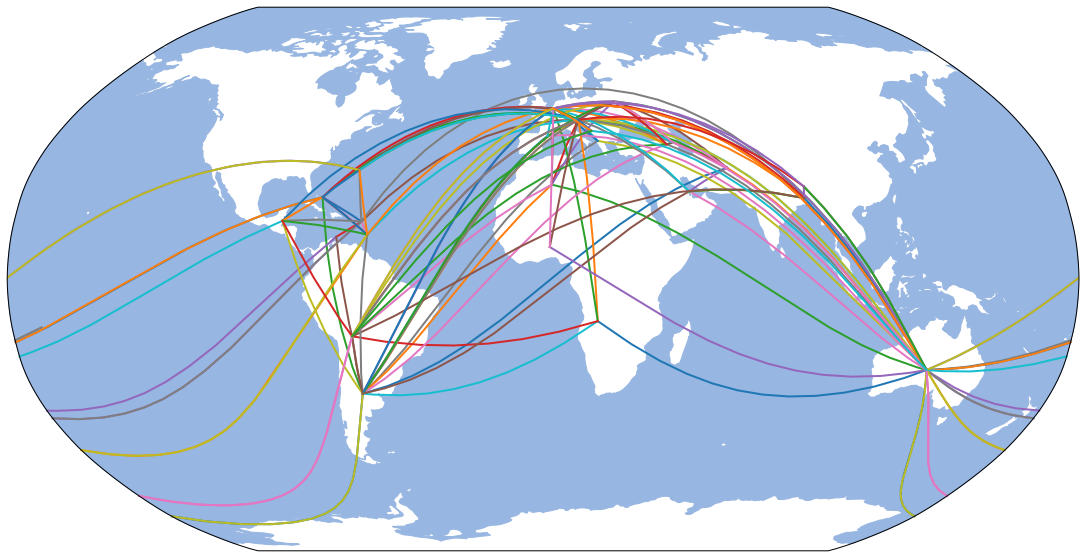

In [6]:
visualization.matrix_plot(world.matrices["un"].iloc[:25, :25])

<module 'matplotlib.pyplot' from '/home/carl/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

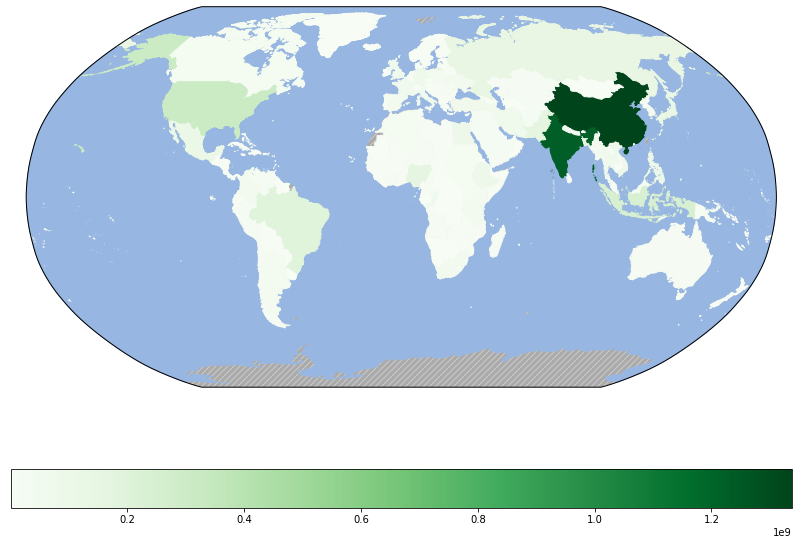

In [7]:
visualization.map_plot(world.data["Population"])

<module 'matplotlib.pyplot' from '/home/carl/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

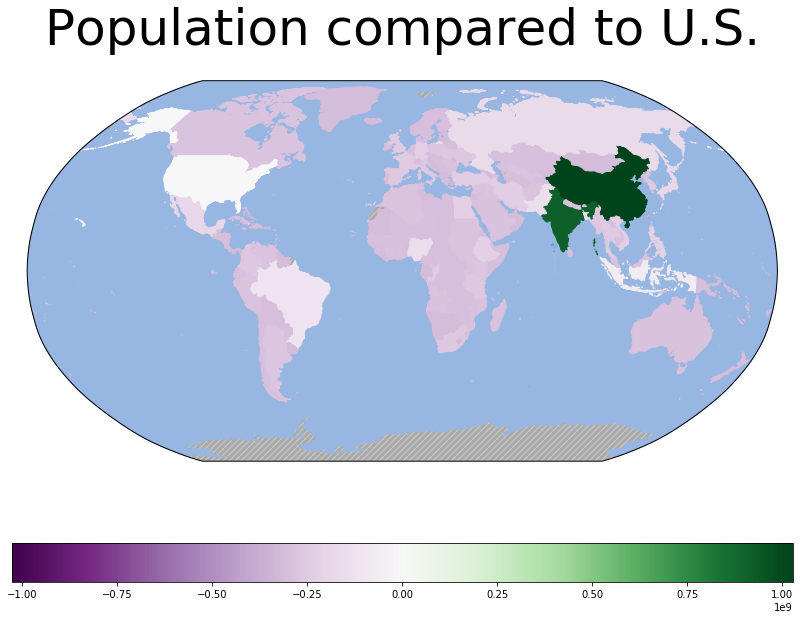

In [8]:
visualization.map_plot(
    world.data["Population"] - world.data["Population"]["USA"],
    title="Population compared to U.S."
)